##### Machine Learning 

With this data, ABC management want to identify potential locations for opening new stores. 
One way we can do this is to predict the sales of new stores given the characteristics of the new store and use the predicted sales (based on ML algorithms) to make the decision. Please follow the instructions below to solve the problem:  

Build a linear regression model to predict the sales of the stores and identify key drivers of sales.

What is the MAPE of the regression model? 

What other metrics can be used to determine model performance?

Report model performance and model summary of final model in an excel file. 

Present the results in an easy-to-read format. 


##### Guidelines for ML Model


Create train-test datasets to avoid overfitting.

Build a Linear Regression model using OLS and summarize the inference.

Use appropriate variable selection methods to find the significant features.

Try to address multicollinearity through feature engineering. 

Consider doing residual analysis to see any patterns in residuals and see where the model is not predicting well or check model performance in store groups.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("DS Internship - EDA - Data.xlsx",parse_dates = True)

In [3]:
df

,Store,Year,Month,Super Division,Sales,SGM,Store Open,Store Close,Outlet Type,State,Climate,Total Sq Ft,Store Modification Date,Store Modification
0,1,2015,2,GIRLS,63635.80,35692.09,1991-03-01,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation
1,1,2015,2,BOYS,20872.93,15691.34,1991-03-01,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation
2,1,2015,2,ACCESSORIES,38717.03,23866.25,1991-03-01,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation
3,1,2015,2,KIDS,11455.00,12110.00,1991-03-01,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation
4,1,2015,3,GIRLS,67507.77,42237.79,1991-03-01,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181232,830,2017,6,BOYS,44711.93,10797.28,2005-11-10,2017-06-26 00:00:00,Strip,B9,Hot,5730.5,2014-02-06 00:00:00,relocation
181233,830,2017,6,ACCESSORIES,33539.67,15998.07,2005-11-10,2017-06-26 00:00:00,Strip,B9,Hot,5730.5,2014-02-06 00:00:00,relocation
181234,830,2017,6,KIDS,11648.04,12042.24,2005-11-10,2017-06-26 00:00:00,Strip,B9,Hot,5730.5,2014-02-06 00:00:00,relocation
181235,830,2017,7,BOYS,11455.42,12107.08,2005-11-10,2017-06-26 00:00:00,Strip,B9,Hot,5730.5,2014-02-06 00:00:00,relocation


In [4]:
df.columns

Index(['Store', 'Year', 'Month', 'Super Division', 'Sales', 'SGM',
       'Store Open', 'Store Close', 'Outlet Type', 'State', 'Climate',
       'Total Sq Ft', 'Store Modification Date', 'Store Modification'],
      dtype='object')

In [5]:
df.dtypes

Store                               int64
Year                                int64
Month                               int64
Super Division                     object
Sales                             float64
SGM                               float64
Store Open                 datetime64[ns]
Store Close                        object
Outlet Type                        object
State                              object
Climate                            object
Total Sq Ft                       float64
Store Modification Date            object
Store Modification                 object
dtype: object

In [14]:
data = df[['Total Sq Ft', 'SGM', 'Super Division', 'Outlet Type', 'Climate', 'Sales']]
data = pd.get_dummies(data, columns=['Outlet Type','Super Division','Climate'], drop_first=True)
data = data.astype(float)

In [15]:
data.dtypes

Total Sq Ft             float64
SGM                     float64
Sales                   float64
Outlet Type_Outlet      float64
Outlet Type_Strip       float64
Super Division_BOYS     float64
Super Division_GIRLS    float64
Super Division_KIDS     float64
Climate_Frigid          float64
Climate_Hot             float64
Climate_Moderate        float64
Climate_Warm            float64
dtype: object

In [16]:
data.columns

Index(['Total Sq Ft', 'SGM', 'Sales', 'Outlet Type_Outlet',
       'Outlet Type_Strip', 'Super Division_BOYS', 'Super Division_GIRLS',
       'Super Division_KIDS', 'Climate_Frigid', 'Climate_Hot',
       'Climate_Moderate', 'Climate_Warm'],
      dtype='object')

In [17]:
data

,Total Sq Ft,SGM,Sales,Outlet Type_Outlet,Outlet Type_Strip,Super Division_BOYS,Super Division_GIRLS,Super Division_KIDS,Climate_Frigid,Climate_Hot,Climate_Moderate,Climate_Warm
0,4735.0,35692.09,63635.80,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,4735.0,15691.34,20872.93,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4735.0,23866.25,38717.03,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4735.0,12110.00,11455.00,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,4735.0,42237.79,67507.77,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
181232,5730.5,10797.28,44711.93,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
181233,5730.5,15998.07,33539.67,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
181234,5730.5,12042.24,11648.04,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
181235,5730.5,12107.08,11455.42,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X = data.drop('Sales', axis=1)
y = data["Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train) 
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 5.913e+05
Date:                Wed, 05 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:07:38   Log-Likelihood:            -1.4181e+06
No. Observations:              144989   AIC:                         2.836e+06
Df Residuals:                  144977   BIC:                         2.836e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9371.0557 

In [20]:
results.params

const                  -9371.055658
Total Sq Ft                0.462423
SGM                        1.727049
Outlet Type_Outlet       683.981084
Outlet Type_Strip        428.686318
Super Division_BOYS     -820.759562
Super Division_GIRLS    6344.596403
Super Division_KIDS    -2011.397995
Climate_Frigid          -334.858481
Climate_Hot               91.957689
Climate_Moderate         -50.717871
Climate_Warm              35.847303
dtype: float64

In [30]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predicted_sales)
rmse = np.sqrt(mse)
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

mape = calculate_mape(y_test, predicted_sales)

print("Model Performance Metrics:")
print(f"MAPE: {mape:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

Model Performance Metrics:
MAPE: 6.50%
MSE: 18504777.96
RMSE: 4301.72


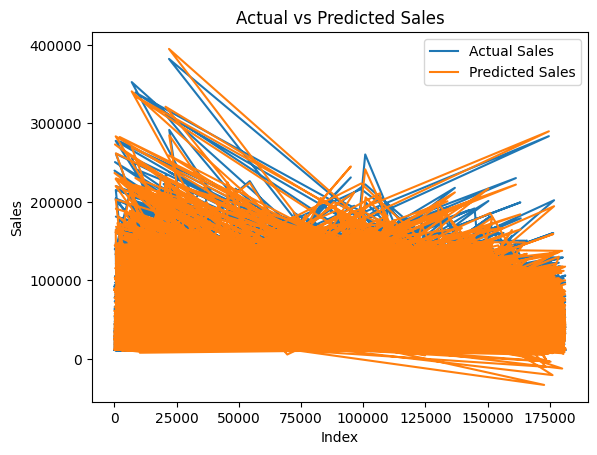

In [27]:
import matplotlib.pyplot as plt

X_test = sm.add_constant(X_test)

predicted_sales = results.predict(X_test)


plt.plot(y_test, label='Actual Sales')
plt.plot(predicted_sales, label='Predicted Sales')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()
